# Circular slide rule generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Plan for the scales:

* A/B : squaring
* C/D : basic log scales
* K : cubing
* S/T : sine and tangent
* Linear scales
* Fahrenheit/Celcius
* Loglog
* Degrees

In [2]:
def circular_ticks(radius,length,ticks,inside):
    '''
    Plot circular tick marks
    '''
    pts=[]
    if inside:
        inner_radius=radius
        outer_radius=radius+length
    else:
        outer_radius=radius
        inner_radius=radius-length
    
    for tick_angle in ticks:
        x1=inner_radius*np.cos(tick_angle)
        y1=inner_radius*np.sin(tick_angle)
        x2=outer_radius*np.cos(tick_angle)
        y2=outer_radius*np.sin(tick_angle)
        pts.append([(x1,y1),(x2,y2)])
        
    return pts

## Basic parameters

In [3]:
points_per_circle = 100

In [4]:
outermost_radius = 86 # mm
K_outer_radius = 85 # mm
K_inner_radius = 70 # mm
A_outer_radius = 70 # mm
A_inner_radius = 60 # mm
C_outer_radius = 60 # mm
C_inner_radius = 51 # mm
D_outer_radius = 50 # mm
D_inner_radius = 37 # mm
S_outer_radius = 37 # mm
S_inner_radius = 25 # mm
split_offset = 2 # mm (difference in radius between split on front and back)

deg_outer_radius = K_outer_radius
deg_inner_radius = K_inner_radius+split_offset
fahr_outer_radius = A_outer_radius+split_offset
fahr_inner_radius = A_inner_radius+split_offset
lin2_outer_radius = C_outer_radius+split_offset
lin2_inner_radius = C_inner_radius+split_offset
lin1_outer_radius = D_outer_radius+split_offset
lin1_inner_radius = D_inner_radius+split_offset

center_hole_diameter = 3.150 # mm (should give a sliding fit for 1/8" brass rod)

## Scale generators

In [5]:
A_gen = lambda x : np.log10(x)*np.pi
C_gen = lambda x : np.log10(x)*2*np.pi
K_gen = lambda x : np.log10(x)*2*np.pi/3
S_gen = lambda x : C_gen(10*np.sin(x*np.pi/180))

deg_gen = lambda x : np.pi*x/180
lin_gen = lambda x : 2*np.pi*x/100
fahr_gen = lambda x : lin_gen(5/9*(x-32))

## Front rings

In [6]:
A_pts=[]
angles=np.linspace(0,2*np.pi,points_per_circle)
xs=A_outer_radius*np.cos(angles)
ys=A_outer_radius*np.sin(angles)
A_pts.append(list(zip(xs,ys)))

xs=A_inner_radius*np.cos(angles)
ys=A_inner_radius*np.sin(angles)
A_pts.append(list(zip(xs,ys)))

A_pts+=circular_ticks(A_inner_radius,
                         (A_outer_radius-A_inner_radius)/2,
                         [A_gen(t) for t in np.arange(1.,11.,1.)],
                         inside=True)

A_pts+=circular_ticks(A_inner_radius,
                         (A_outer_radius-A_inner_radius)/3,
                         [A_gen(t) for t in np.arange(1.,10.1,0.1)],
                         inside=True)

A_pts+=circular_ticks(A_inner_radius,
                         (A_outer_radius-A_inner_radius)/4,
                         [A_gen(t) for t in np.arange(1.,2.01,0.01)],
                         inside=True)

A_pts+=circular_ticks(A_inner_radius,
                         (A_outer_radius-A_inner_radius)/2,
                         [A_gen(t) for t in np.arange(10.,100.,10.)],
                         inside=True)

A_pts+=circular_ticks(A_inner_radius,
                         (A_outer_radius-A_inner_radius)/3,
                         [A_gen(t) for t in np.arange(10.,101.,1.)],
                         inside=True)

A_pts+=circular_ticks(A_inner_radius,
                         (A_outer_radius-A_inner_radius)/4,
                         [A_gen(t) for t in np.arange(10.,20.1,0.1)],
                         inside=True)

In [7]:
K_pts=[]
angles=np.linspace(0,2*np.pi,points_per_circle)
xs=K_outer_radius*np.cos(angles)
ys=K_outer_radius*np.sin(angles)
K_pts.append(list(zip(xs,ys)))

xs=K_inner_radius*np.cos(angles)
ys=K_inner_radius*np.sin(angles)
K_pts.append(list(zip(xs,ys)))

K_pts+=circular_ticks(K_inner_radius,
                         (K_outer_radius-K_inner_radius)/2,
                         [K_gen(t) for t in np.arange(1.,11.,1.)],
                         inside=True)

K_pts+=circular_ticks(K_inner_radius,
                         (K_outer_radius-K_inner_radius)/3,
                         [K_gen(t) for t in np.arange(1.,10.1,0.1)],
                         inside=True)

K_pts+=circular_ticks(K_inner_radius,
                         (K_outer_radius-K_inner_radius)/4,
                         [K_gen(t) for t in np.arange(1.,2.01,0.01)],
                         inside=True)

K_pts+=circular_ticks(K_inner_radius,
                         (K_outer_radius-K_inner_radius)/2,
                         [K_gen(t) for t in np.arange(10.,100.,10.)],
                         inside=True)

K_pts+=circular_ticks(K_inner_radius,
                         (K_outer_radius-K_inner_radius)/3,
                         [K_gen(t) for t in np.arange(10.,101.,1.)],
                         inside=True)

K_pts+=circular_ticks(K_inner_radius,
                         (K_outer_radius-K_inner_radius)/2,
                         [K_gen(t) for t in np.arange(100.,1000.,100.)],
                         inside=True)

K_pts+=circular_ticks(K_inner_radius,
                         (K_outer_radius-K_inner_radius)/4,
                         [K_gen(t) for t in np.arange(100.,1000.,10.)],
                         inside=True)

K_pts+=circular_ticks(K_inner_radius,
                         (K_outer_radius-K_inner_radius)/4,
                         [K_gen(t) for t in np.arange(10.,20.1,0.1)],
                         inside=True)

In [8]:
C_pts=[]
angles=np.linspace(0,2*np.pi,points_per_circle)
xs=C_outer_radius*np.cos(angles)
ys=C_outer_radius*np.sin(angles)
C_pts.append(list(zip(xs,ys)))

xs=C_inner_radius*np.cos(angles)
ys=C_inner_radius*np.sin(angles)
C_pts.append(list(zip(xs,ys)))

C_pts+=circular_ticks(C_inner_radius,
                         (C_outer_radius-C_inner_radius)/2,
                         [C_gen(np.pi),C_gen(180/np.pi)],
                         inside=True)

C_pts+=circular_ticks(C_inner_radius,
                         (C_outer_radius-C_inner_radius)/2,
                         [C_gen(t) for t in np.arange(1.,11.,1.)],
                         inside=True)

C_pts+=circular_ticks(C_inner_radius,
                         (C_outer_radius-C_inner_radius)/3,
                         [C_gen(t) for t in np.arange(1.,10.1,0.1)],
                         inside=True)

C_pts+=circular_ticks(C_inner_radius,
                         (C_outer_radius-C_inner_radius)/4,
                         [C_gen(t) for t in np.arange(1.,4.01,0.01)],
                         inside=True)

In [9]:
D_pts=[]
angles=np.linspace(0,2*np.pi,points_per_circle)
xs=D_outer_radius*np.cos(angles)
ys=D_outer_radius*np.sin(angles)
D_pts.append(list(zip(xs,ys)))

xs=D_inner_radius*np.cos(angles)
ys=D_inner_radius*np.sin(angles)
D_pts.append(list(zip(xs,ys)))

D_pts+=circular_ticks(D_outer_radius,
                         (D_outer_radius-D_inner_radius)/2,
                         [C_gen(np.pi),C_gen(180/np.pi)],
                         inside=False)

D_pts+=circular_ticks(D_outer_radius,
                         (D_outer_radius-D_inner_radius)/2,
                         [C_gen(t) for t in np.arange(1.,11.,1.)],
                         inside=False)

D_pts+=circular_ticks(D_outer_radius,
                         (D_outer_radius-D_inner_radius)/3,
                         [C_gen(t) for t in np.arange(1.,10.1,0.1)],
                         inside=False)

D_pts+=circular_ticks(D_outer_radius,
                         (D_outer_radius-D_inner_radius)/4,
                         [C_gen(t) for t in np.arange(1.,4.01,0.01)],
                         inside=False)

In [10]:
S_pts=[]
angles=np.linspace(0,2*np.pi,points_per_circle)
xs=S_outer_radius*np.cos(angles)
ys=S_outer_radius*np.sin(angles)
S_pts.append(list(zip(xs,ys)))

xs=S_inner_radius*np.cos(angles)
ys=S_inner_radius*np.sin(angles)
S_pts.append(list(zip(xs,ys)))

S_pts+=circular_ticks(S_outer_radius,
                         (S_outer_radius-S_inner_radius)/2,
                         [S_gen(t) for t in np.arange(10.,90.,10.)],
                         inside=False)

S_pts+=circular_ticks(S_outer_radius,
                         (S_outer_radius-S_inner_radius)/4,
                         [S_gen(t) for t in np.arange(6.,90.,1.)],
                         inside=False)

Reference diagram, which is *not for cutting* because it does not incorporate the offset

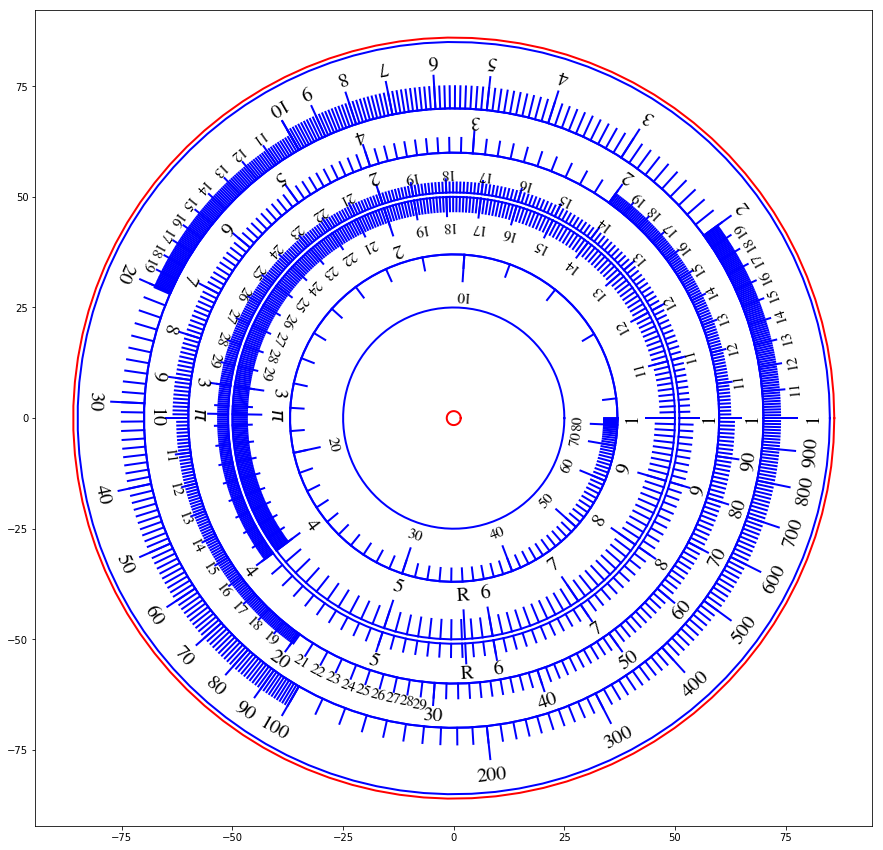

In [11]:
plt.figure(figsize=(15,15))

plt.plot(center_hole_diameter/2*np.cos(angles),center_hole_diameter/2*np.sin(angles),'r', linewidth=2)
plt.plot(outermost_radius*np.cos(angles),outermost_radius*np.sin(angles),'r', linewidth=2)

## K scale

for segment in K_pts:
    plt.plot([p[0] for p in segment],
             [p[1] for p in segment], 'b',linewidth=2)

for tic in range(1,11):
    angle=K_gen(tic)
    plt.text((K_inner_radius+(K_outer_radius-K_inner_radius)*0.75)*np.cos(angle),
             (K_inner_radius+(K_outer_radius-K_inner_radius)*0.75)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)

for tic in range(20,110,10):
    angle=K_gen(tic)
    plt.text((K_inner_radius+(K_outer_radius-K_inner_radius)*0.75)*np.cos(angle),
             (K_inner_radius+(K_outer_radius-K_inner_radius)*0.75)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)

for tic in range(200,1000,100):
    angle=K_gen(tic)
    plt.text((K_inner_radius+(K_outer_radius-K_inner_radius)*0.75)*np.cos(angle),
             (K_inner_radius+(K_outer_radius-K_inner_radius)*0.75)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)
    
for tic in range(11,20):
    if tic % 10:
        angle=K_gen(tic*0.1)
        plt.text((K_inner_radius+(K_outer_radius-K_inner_radius)*0.5)*np.cos(angle),
                 (K_inner_radius+(K_outer_radius-K_inner_radius)*0.5)*np.sin(angle),
                 str(tic),
                 rotation=90+angle*180/np.pi,
                 ha='center',va='center',fontname='FreeSerif',fontsize=15)
        
for tic in range(11,20):
    if tic % 10:
        angle=K_gen(tic)
        plt.text((K_inner_radius+(K_outer_radius-K_inner_radius)*0.5)*np.cos(angle),
                 (K_inner_radius+(K_outer_radius-K_inner_radius)*0.5)*np.sin(angle),
                 str(tic),
                 rotation=90+angle*180/np.pi,
                 ha='center',va='center',fontname='FreeSerif',fontsize=15)

## A scale

for segment in A_pts:
    plt.plot([p[0] for p in segment],
             [p[1] for p in segment], 'b',linewidth=2)
    
for tic in range(1,11):
    angle=A_gen(tic)
    plt.text((A_inner_radius+(A_outer_radius-A_inner_radius)*0.75)*np.cos(angle),
             (A_inner_radius+(A_outer_radius-A_inner_radius)*0.75)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)

for tic in range(20,100,10):
    angle=A_gen(tic)
    plt.text((A_inner_radius+(A_outer_radius-A_inner_radius)*0.75)*np.cos(angle),
             (A_inner_radius+(A_outer_radius-A_inner_radius)*0.75)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)
    
for tic in range(11,20):
    if tic % 10:
        angle=A_gen(tic*0.1)
        plt.text((A_inner_radius+(A_outer_radius-A_inner_radius)*0.5)*np.cos(angle),
             (A_inner_radius+(A_outer_radius-A_inner_radius)*0.5)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=15)
        
for tic in range(11,30):
    if tic % 10:
        angle=A_gen(tic)
        plt.text((A_inner_radius+(A_outer_radius-A_inner_radius)*0.5)*np.cos(angle),
             (A_inner_radius+(A_outer_radius-A_inner_radius)*0.5)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=15)

## C scale

for segment in C_pts:
    plt.plot([p[0] for p in segment],
             [p[1] for p in segment], 'b',linewidth=2)
    
for tic in range(1,10):
    angle=C_gen(tic)
    plt.text((C_inner_radius+(C_outer_radius-C_inner_radius)*0.75)*np.cos(angle),
             (C_inner_radius+(C_outer_radius-C_inner_radius)*0.75)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)

for tic in range(11,30):
    if tic % 10:
        angle=C_gen(tic*0.1)
        plt.text((C_inner_radius+(C_outer_radius-C_inner_radius)*0.5)*np.cos(angle),
             (C_inner_radius+(C_outer_radius-C_inner_radius)*0.5)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=15)

angle=C_gen(np.pi)
plt.text((C_inner_radius+(C_outer_radius-C_inner_radius)*0.75)*np.cos(angle),
         (C_inner_radius+(C_outer_radius-C_inner_radius)*0.75)*np.sin(angle),
         '$\pi$',
         rotation=90+angle*180/np.pi,
         ha='center',va='center',fontname='FreeSerif',fontsize=20)

angle=C_gen(18/np.pi)
plt.text((C_inner_radius+(C_outer_radius-C_inner_radius)*0.75)*np.cos(angle),
         (C_inner_radius+(C_outer_radius-C_inner_radius)*0.75)*np.sin(angle),
         'R',
         rotation=90+angle*180/np.pi,
         ha='center',va='center',fontname='FreeSerif',fontsize=20)

## D scale

for segment in D_pts:
    plt.plot([p[0] for p in segment],
             [p[1] for p in segment], 'b',linewidth=2)
    
for tic in range(1,10):
    angle=C_gen(tic)
    plt.text((D_outer_radius-(D_outer_radius-D_inner_radius)*0.75)*np.cos(angle),
             (D_outer_radius-(D_outer_radius-D_inner_radius)*0.75)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)

for tic in range(11,30):
    if tic % 10:
        angle=C_gen(tic*0.1)
        plt.text((D_outer_radius-(D_outer_radius-D_inner_radius)*0.5)*np.cos(angle),
             (D_outer_radius-(D_outer_radius-D_inner_radius)*0.5)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=15)

angle=C_gen(np.pi)
plt.text((D_outer_radius-(D_outer_radius-D_inner_radius)*0.75)*np.cos(angle),
         (D_outer_radius-(D_outer_radius-D_inner_radius)*0.75)*np.sin(angle),
         '$\pi$',
         rotation=90-angle*180/np.pi,
         ha='center',va='center',fontname='FreeSerif',fontsize=20)

angle=C_gen(180/np.pi)
plt.text((D_outer_radius-(D_outer_radius-D_inner_radius)*0.75)*np.cos(angle),
         (D_outer_radius-(D_outer_radius-D_inner_radius)*0.75)*np.sin(angle),
         'R',
         rotation=90+angle*180/np.pi,
         ha='center',va='center',fontname='FreeSerif',fontsize=20)

## S scale

for segment in S_pts:
    plt.plot([p[0] for p in segment],
             [p[1] for p in segment], 'b',linewidth=2)
    
for tic in range(10,90,10):
    angle=S_gen(tic)
    plt.text((S_outer_radius-(S_outer_radius-S_inner_radius)*0.75)*np.cos(angle),
             (S_outer_radius-(S_outer_radius-S_inner_radius)*0.75)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=15)
    
plt.axis('equal')
plt.savefig('front_draft.svg')

## Back rings

In [12]:
deg_pts=[]
angles=np.linspace(0,2*np.pi,points_per_circle)
xs=deg_outer_radius*np.cos(angles)
ys=deg_outer_radius*np.sin(angles)
deg_pts.append(list(zip(xs,ys)))

xs=deg_inner_radius*np.cos(angles)
ys=deg_inner_radius*np.sin(angles)
deg_pts.append(list(zip(xs,ys)))

deg_pts+=circular_ticks(deg_outer_radius,
                         (deg_outer_radius-deg_inner_radius)/2,
                         [deg_gen(t) for t in np.arange(0.,360.,10.)],
                         inside=False)

deg_pts+=circular_ticks(deg_outer_radius,
                         (deg_outer_radius-deg_inner_radius)/4,
                         [deg_gen(t) for t in np.arange(0.,360.,1.)],
                         inside=False)

In [13]:
fahr_pts=[]
angles=np.linspace(0,2*np.pi,points_per_circle)
xs=fahr_outer_radius*np.cos(angles)
ys=fahr_outer_radius*np.sin(angles)
fahr_pts.append(list(zip(xs,ys)))

xs=fahr_inner_radius*np.cos(angles)
ys=fahr_inner_radius*np.sin(angles)
fahr_pts.append(list(zip(xs,ys)))

fahr_pts+=circular_ticks(fahr_inner_radius,
                         (fahr_outer_radius-fahr_inner_radius)/2,
                         [fahr_gen(t) for t in np.arange(30.,212.,10.)],
                         inside=True)

fahr_pts+=circular_ticks(fahr_inner_radius,
                         (fahr_outer_radius-fahr_inner_radius)/4,
                         [fahr_gen(t) for t in np.arange(30.,212.,1.)],
                         inside=True)

In [14]:
lin2_pts=[]
angles=np.linspace(0,2*np.pi,points_per_circle)
xs=lin2_outer_radius*np.cos(angles)
ys=lin2_outer_radius*np.sin(angles)
lin2_pts.append(list(zip(xs,ys)))

xs=lin2_inner_radius*np.cos(angles)
ys=lin2_inner_radius*np.sin(angles)
lin2_pts.append(list(zip(xs,ys)))

lin2_pts+=circular_ticks(lin2_inner_radius,
                         (lin2_outer_radius-lin2_inner_radius)/2,
                         [lin_gen(t) for t in np.arange(0.,100.,10.)],
                         inside=True)

lin2_pts+=circular_ticks(lin2_inner_radius,
                         (lin2_outer_radius-lin2_inner_radius)/4,
                         [lin_gen(t) for t in np.arange(0.,100.,1.)],
                         inside=True)

In [15]:
lin1_pts=[]
angles=np.linspace(0,2*np.pi,points_per_circle)
xs=lin1_outer_radius*np.cos(angles)
ys=lin1_outer_radius*np.sin(angles)
lin1_pts.append(list(zip(xs,ys)))

xs=lin1_inner_radius*np.cos(angles)
ys=lin1_inner_radius*np.sin(angles)
lin1_pts.append(list(zip(xs,ys)))

lin1_pts+=circular_ticks(lin1_outer_radius,
                         (lin1_outer_radius-lin1_inner_radius)/2,
                         [lin_gen(t) for t in np.arange(0.,100.,10.)],
                         inside=False)

lin1_pts+=circular_ticks(lin1_outer_radius,
                         (lin1_outer_radius-lin1_inner_radius)/4,
                         [lin_gen(t) for t in np.arange(0.,100.,1.)],
                         inside=False)

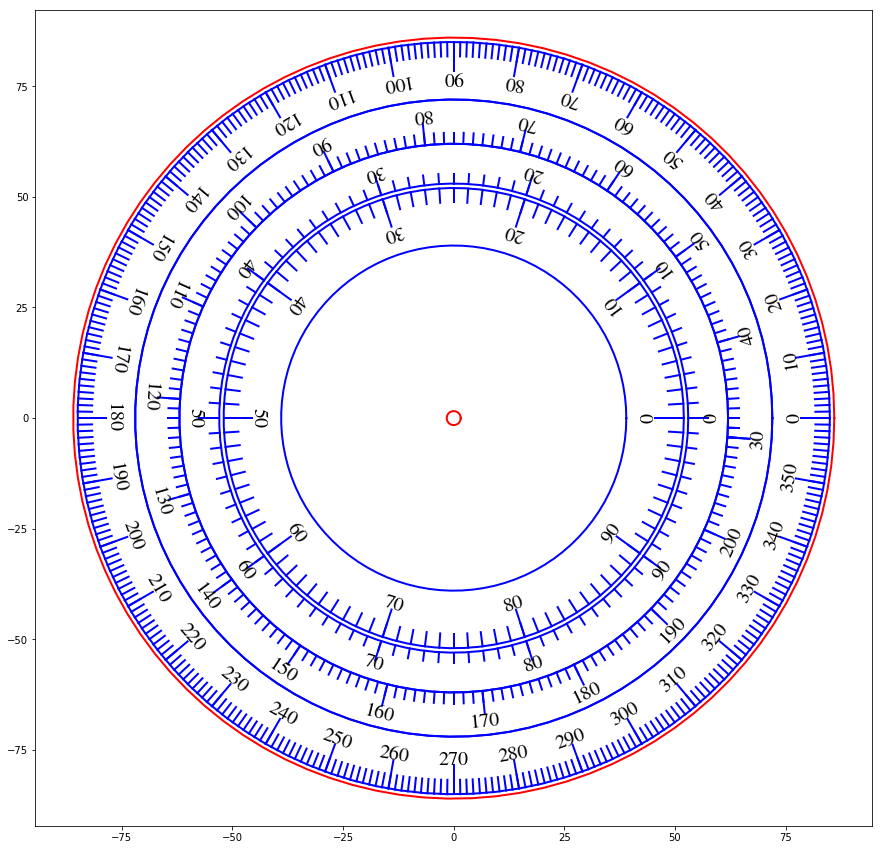

In [16]:
plt.figure(figsize=(15,15))

plt.plot(center_hole_diameter/2*np.cos(angles),center_hole_diameter/2*np.sin(angles),'r', linewidth=2)
plt.plot(outermost_radius*np.cos(angles),outermost_radius*np.sin(angles),'r', linewidth=2)

## degrees scale

for segment in deg_pts:
    plt.plot([p[0] for p in segment],
             [p[1] for p in segment], 'b',linewidth=2)
    
for tic in range(0,360,10):
    angle=deg_gen(tic)
    plt.text((deg_outer_radius-(deg_outer_radius-deg_inner_radius)*0.6)*np.cos(angle),
             (deg_outer_radius-(deg_outer_radius-deg_inner_radius)*0.6)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)
    
## Fahrenheit scale

for segment in fahr_pts:
    plt.plot([p[0] for p in segment],
             [p[1] for p in segment], 'b',linewidth=2)
    
for tic in range(30,210,10):
    angle=fahr_gen(tic)
    plt.text((fahr_outer_radius-(fahr_outer_radius-fahr_inner_radius)*0.3)*np.cos(angle),
             (fahr_outer_radius-(fahr_outer_radius-fahr_inner_radius)*0.3)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)

## Outer linear scale

for segment in lin2_pts:
    plt.plot([p[0] for p in segment],
             [p[1] for p in segment], 'b',linewidth=2)
    
for tic in range(0,100,10):
    angle=lin_gen(tic)
    plt.text((lin2_inner_radius+(lin2_outer_radius-lin2_inner_radius)*0.6)*np.cos(angle),
             (lin2_inner_radius+(lin2_outer_radius-lin2_inner_radius)*0.6)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)

## Inner linear scale

for segment in lin1_pts:
    plt.plot([p[0] for p in segment],
             [p[1] for p in segment], 'b',linewidth=2)
    
for tic in range(0,100,10):
    angle=lin_gen(tic)
    plt.text((lin1_outer_radius-(lin1_outer_radius-lin1_inner_radius)*0.6)*np.cos(angle),
             (lin1_outer_radius-(lin1_outer_radius-lin1_inner_radius)*0.6)*np.sin(angle),
             str(tic),
             rotation=90+angle*180/np.pi,
             ha='center',va='center',fontname='FreeSerif',fontsize=20)
    
plt.axis('equal')
plt.savefig('back_draft.svg')